In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

df = pd.read_csv('../../data/student-dataset.csv')

df = df[['Student','pref_audio','pref_image','pref_infographic','pref_games','pref_webpgs','pref_table','pref_text','pref_tutorial','pref_video','pref_forum']]

df

,Student,pref_audio,pref_image,pref_infographic,pref_games,pref_webpgs,pref_table,pref_text,pref_tutorial,pref_video,pref_forum
0,1,5,0,7,0,2,3,1,7,9,8
1,2,9,8,4,7,4,8,0,6,2,7
2,3,10,9,4,7,5,9,0,6,3,7
3,4,0,0,4,7,1,3,1,1,8,7
4,5,1,0,3,6,0,4,1,1,7,6
5,6,5,0,6,1,2,4,1,7,7,7
6,7,9,0,4,4,5,4,6,6,8,4
7,8,0,0,3,7,0,3,2,1,8,7
8,9,0,0,3,7,0,3,1,1,8,7
9,10,10,0,5,4,5,5,7,6,9,4


In [4]:
X = np.array(df.drop('Student', axis = 1))

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)

In [6]:
X

array([[ 5,  0,  7, ...,  7,  9,  8],
       [ 9,  8,  4, ...,  6,  2,  7],
       [10,  9,  4, ...,  6,  3,  7],
       ...,
       [ 5,  0,  7, ...,  7,  9,  8],
       [ 0,  0,  3, ...,  1,  7,  6],
       [ 5,  0,  7, ...,  8,  8,  7]])

In [9]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
kmeans.labels_

array([2, 3, 3, 0, 0, 2, 4, 0, 0, 4, 4, 2, 0, 1, 4, 4, 0, 3, 2, 3, 4, 4,
       2, 0, 4, 4, 0, 1, 2, 4, 2, 4, 3, 3, 4, 2, 1, 0, 3, 2, 0, 0, 2, 1,
       4, 1, 4, 0, 4, 1, 3, 3, 1, 1, 2, 4, 4, 2, 3, 1, 2, 2, 2, 0, 2, 1,
       1, 4, 0, 3, 2, 4, 3, 1, 0, 1, 3, 3, 2, 3, 2, 0, 1, 1, 2, 1, 3, 3,
       1, 3, 0, 2, 0, 4, 4, 1, 4, 3, 4, 2, 1, 2, 1, 4, 4, 4, 2, 3, 2, 3,
       3, 2, 3, 0, 0, 3, 3, 4, 1, 1, 1, 0, 4, 1, 2, 2, 3, 3, 3, 1, 4, 2,
       1, 4, 3, 2, 4, 3, 3, 0, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 0, 2, 0, 4,
       4, 3, 3, 0, 0, 1, 4, 1, 2, 4, 1, 0, 3, 0, 4, 0, 4, 3, 0, 0, 0, 4,
       1, 0, 2, 4, 4, 1, 0, 1, 0, 0, 0, 2, 3, 2, 3, 1, 0, 1, 4, 1, 2, 3,
       1, 0, 3, 1, 3, 2, 3, 0, 4, 3, 3, 4, 3, 0, 0, 1, 2, 0, 3, 2, 1, 2,
       1, 4, 1, 1, 0, 1, 3, 4, 4, 0, 0, 2, 2, 1, 0, 2, 0, 3, 0, 4, 0, 1,
       4, 1, 4, 2, 3, 4, 4, 1, 4, 1, 2, 3, 1, 3, 3, 2, 4, 2, 3, 4, 3, 2,
       4, 1, 4, 3, 3, 0, 0, 0, 1, 0, 3, 3, 4, 2, 0, 2, 3, 3, 3, 3, 3, 2,
       1, 0, 0, 2, 0, 3, 1, 0, 4, 2, 0, 0, 2, 4, 2,

In [11]:
df['grupos'] = kmeans.labels_

In [14]:
df['grupos']

0      2
1      3
2      3
3      0
4      0
5      2
6      4
7      0
8      0
9      4
10     4
11     2
12     0
13     1
14     4
15     4
16     0
17     3
18     2
19     3
20     4
21     4
22     2
23     0
24     4
25     4
26     0
27     1
28     2
29     4
      ..
365    2
366    2
367    2
368    4
369    4
370    3
371    1
372    2
373    3
374    1
375    3
376    4
377    2
378    1
379    2
380    1
381    1
382    0
383    4
384    3
385    2
386    0
387    0
388    4
389    0
390    0
391    4
392    2
393    0
394    2
Name: grupos, Length: 395, dtype: int32

In [19]:
sb.pairplot(df.drop(['Student'], axis = 1), hue='grupos', vars=['pref_audio','pref_image','pref_infographic','pref_games','pref_webpgs','pref_table','pref_text','pref_tutorial','pref_video','pref_forum'], palette=sb.color_palette("tab10", n_colors=5

SyntaxError: unexpected EOF while parsing (<ipython-input-19-3c7a28471eab>, line 1)

In [16]:
from sklearn import metrics
from scipy.spatial.distance import cdist

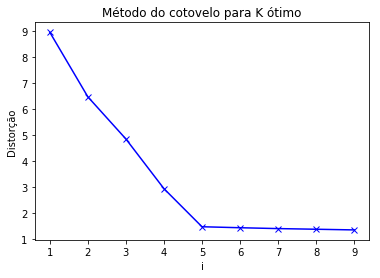

In [17]:
K = range(1,10)
distortions = []

for i in K:
    kmeanModel = KMeans(n_clusters=i).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
pl.plot(K, distortions, 'bx-')
pl.xlabel('i')
pl.ylabel('Distorção')
pl.title('Método do cotovelo para K ótimo')
pl.show()